# Data Analysis Notebook

Este notebook está creado para realizar un análisis EDA sobre la base de datos de entrenamiento del proyecto. Nos ayudará a entender la estructura y los objetivos.

## Cargamos el dataset

In [1]:
# Imprtamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos las funciones de utilidad
from data_utils import *

# Hacemos que los gráficos se muestren en el notebook
%matplotlib inline
plt.style.use('default')  # Cambiamos 'seaborn' por 'default'
sns.set_theme()  # Esto aplicará el estilo de seaborn de manera correcta
plt.rcParams['figure.figsize'] = (12, 6)

# Leemos el archivo CSV
df = pd.read_csv('train.csv')

# Display original column names
print("Nombres de las columnas:")
print(df.columns.tolist())

# Estandarizamos los nombres de las columnas
df = standardize_column_names(df)

# Mostramos las primeras filas del dataset
print("\nLas primeras filas del dataset:")
display(df.head())

Nombres de las columnas:
['id', 'Age', 'Gender', 'Annual Income', 'Marital Status', 'Number of Dependents', 'Education Level', 'Occupation', 'Health Score', 'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Premium Amount']
Column name changes:
Age                            -> age
Gender                         -> gender
Annual Income                  -> annual_income
Marital Status                 -> marital_status
Number of Dependents           -> number_of_dependents
Education Level                -> education_level
Occupation                     -> occupation
Health Score                   -> health_score
Location                       -> location
Policy Type                    -> policy_type
Previous Claims                -> previous_claims
Vehicle Age                    -> vehicle_age
Credit Score                   -> credit_score
I

,id,age,gender,annual_income,marital_status,number_of_dependents,education_level,occupation,health_score,location,...,previous_claims,vehicle_age,credit_score,insurance_duration,policy_start_date,customer_feedback,smoking_status,exercise_frequency,property_type,premium_amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0



Columnas con valores faltantes:


,missing_count,missing_percentage,dtype
previous_claims,364029,30.335750,float64
occupation,358075,29.839583,object
credit_score,137882,11.490167,float64
number_of_dependents,109672,9.139333,float64
customer_feedback,77824,6.485333,object
health_score,74076,6.173000,float64
annual_income,44949,3.745750,float64
age,18705,1.558750,float64
marital_status,18529,1.544083,object
vehicle_age,6,0.000500,float64


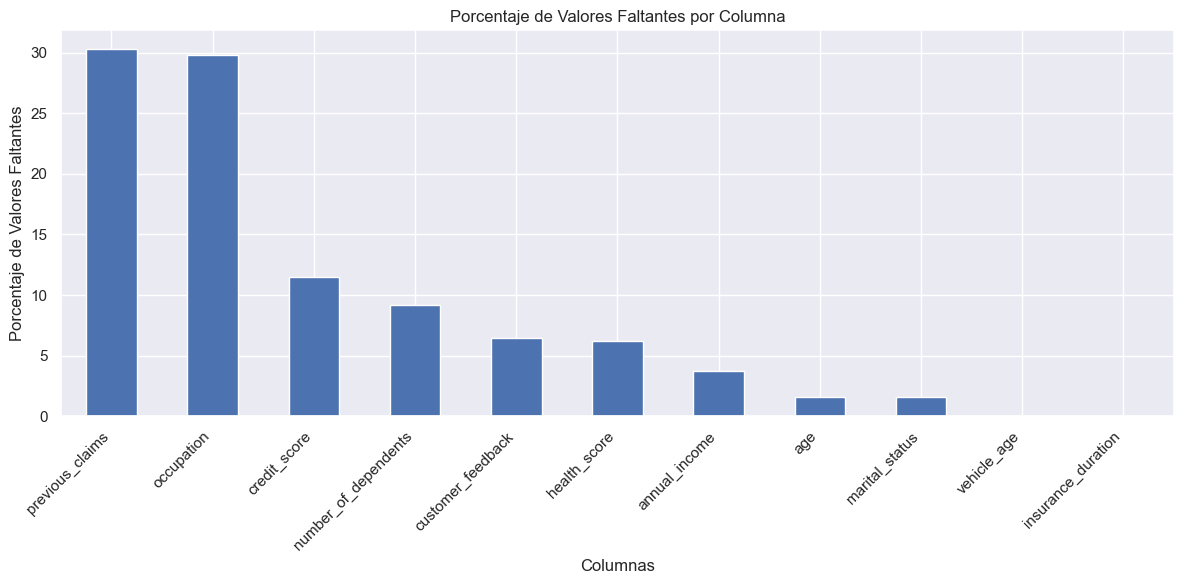

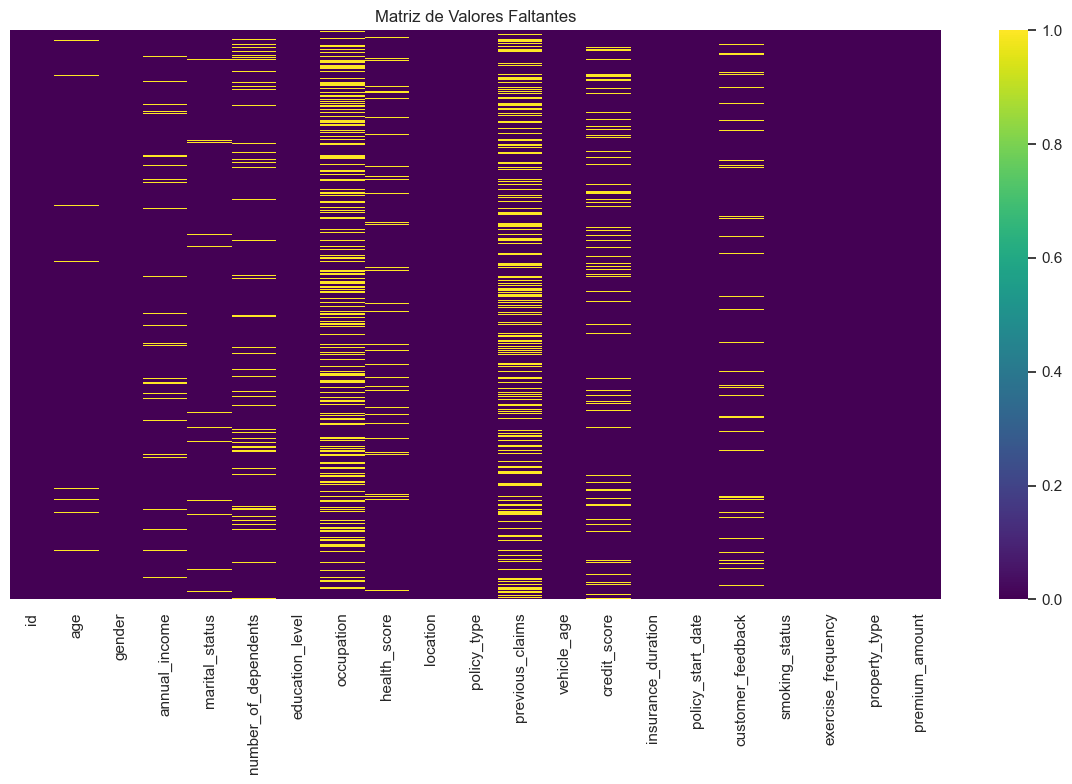

In [2]:
# Celda 3: Análisis de valores faltantes
# Calcular estadísticas de valores faltantes
missing_stats = analyze_missing_values(df)

# Mostrar estadísticas de valores faltantes
print("\nColumnas con valores faltantes:")
display(missing_stats[missing_stats['missing_count'] > 0])

# Visualizar valores faltantes
plt.figure(figsize=(12, 6))
missing_stats[missing_stats['missing_percentage'] > 0]['missing_percentage'].plot(kind='bar')
plt.title('Porcentaje de Valores Faltantes por Columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Matriz de valores faltantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Matriz de Valores Faltantes')
plt.tight_layout()
plt.show()


Estadísticas de variables numéricas:


,id,age,annual_income,number_of_dependents,health_score,previous_claims,vehicle_age,credit_score,insurance_duration,premium_amount
count,1.200000e+06,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,5.999995e+05,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,3.464103e+05,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,0.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,2.999998e+05,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,5.999995e+05,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,8.999992e+05,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,1.199999e+06,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03
skew,3.836279e-16,-1.253192e-02,1.470357e+00,-1.325461e-02,2.821873e-01,0.905321,-2.040888e-02,-1.135726e-01,-8.793302e-03,1.240915e+00
kurtosis,-1.200000e+00,-1.194939e+00,1.794970e+00,-1.306282e+00,-7.849997e-01,0.740091,-1.206448e+00,-1.090102e+00,-1.237252e+00,1.518586e+00



Distribuciones de variables numéricas:


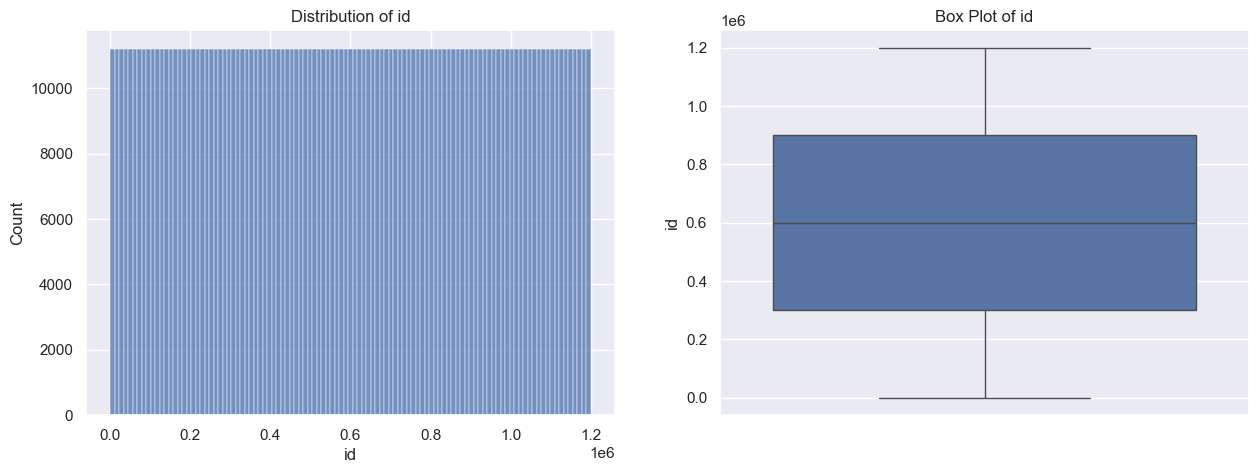

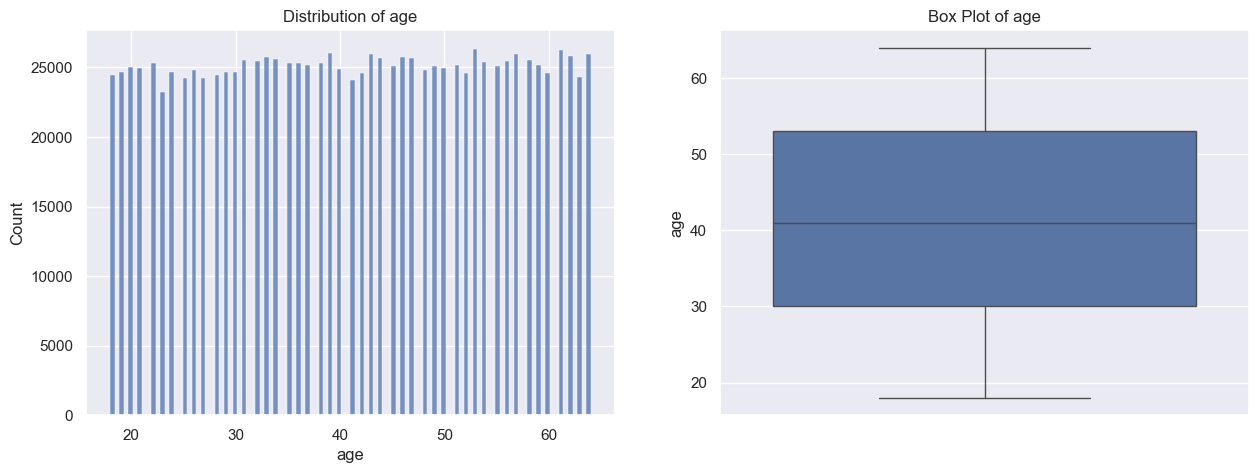

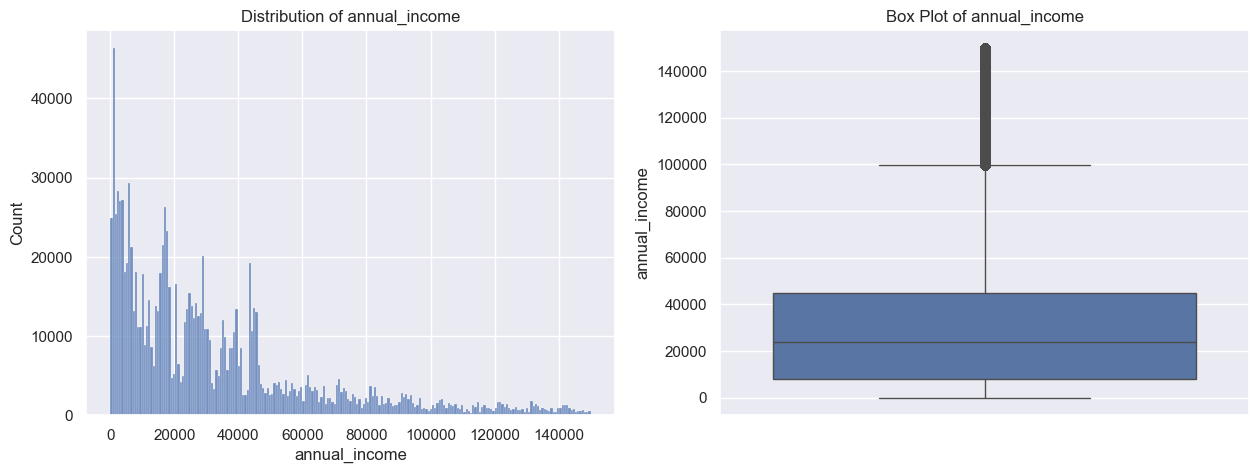

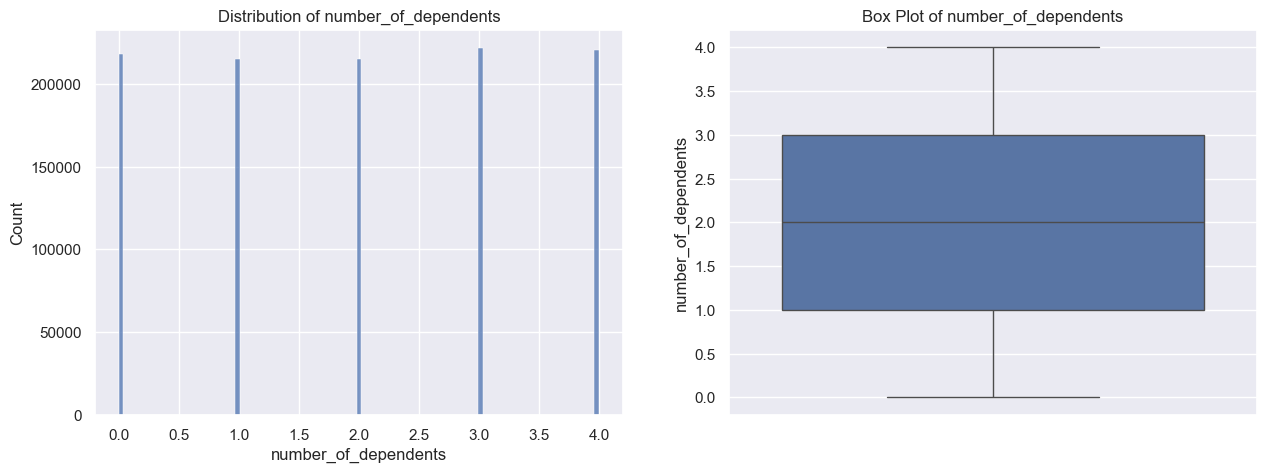

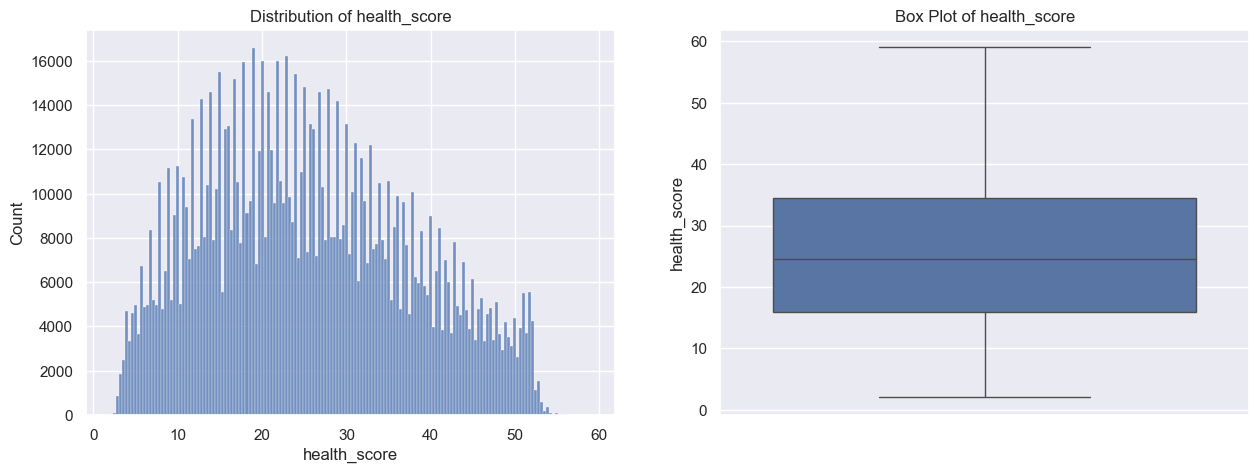

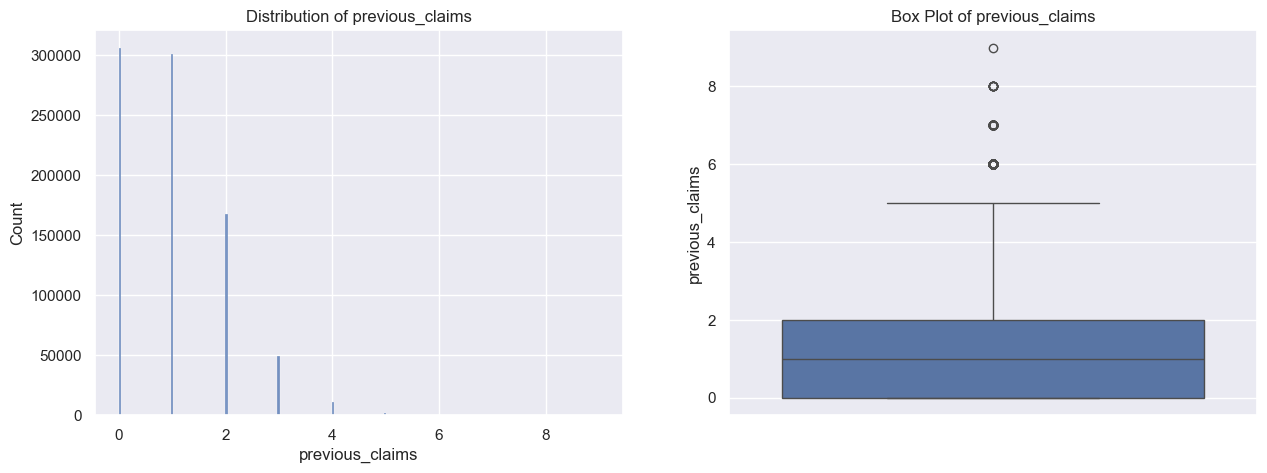

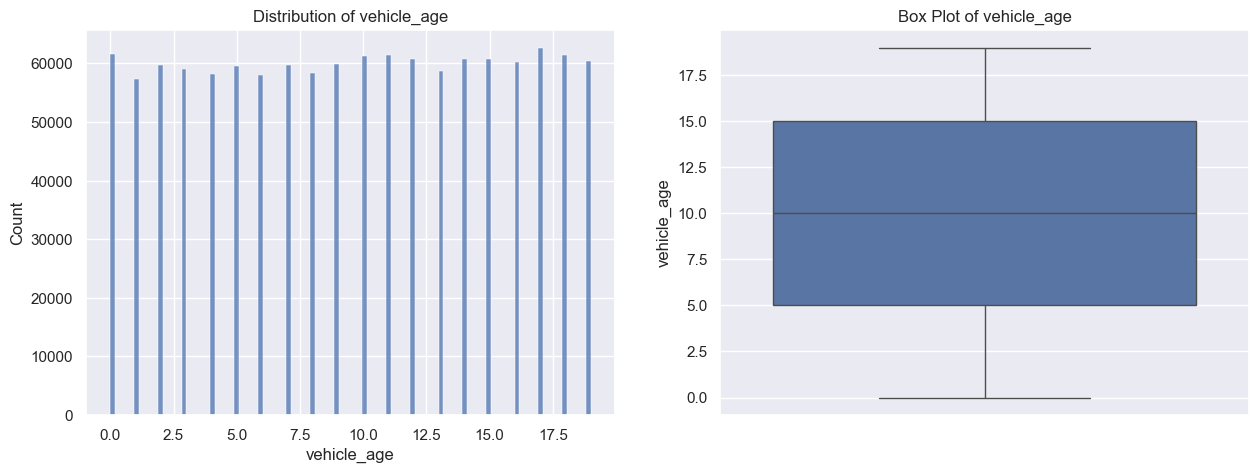

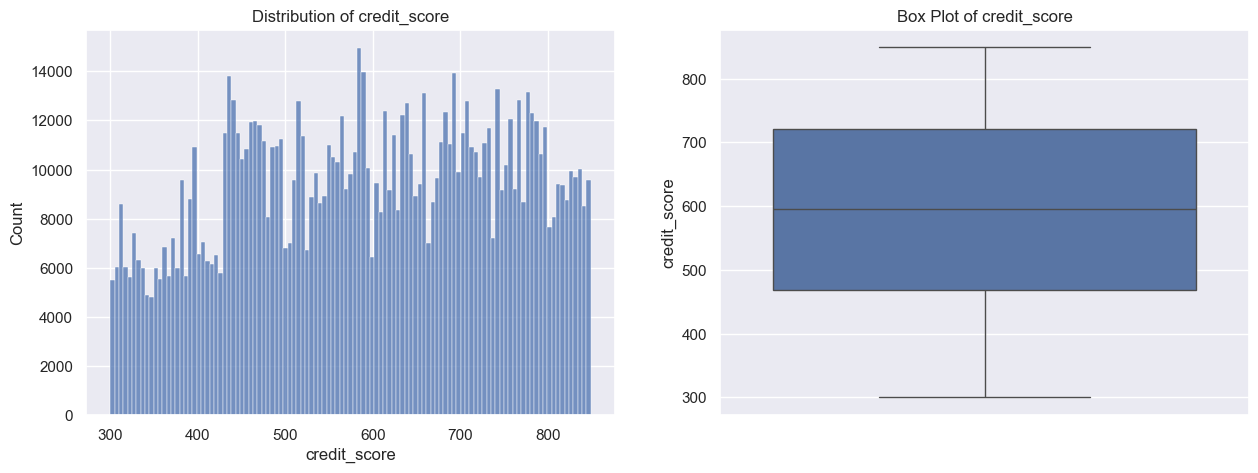

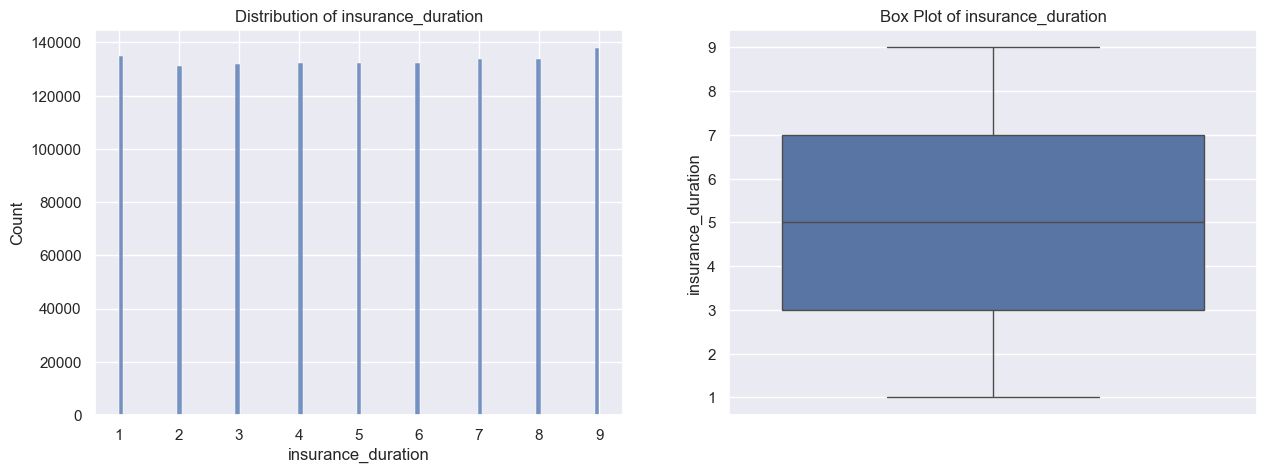

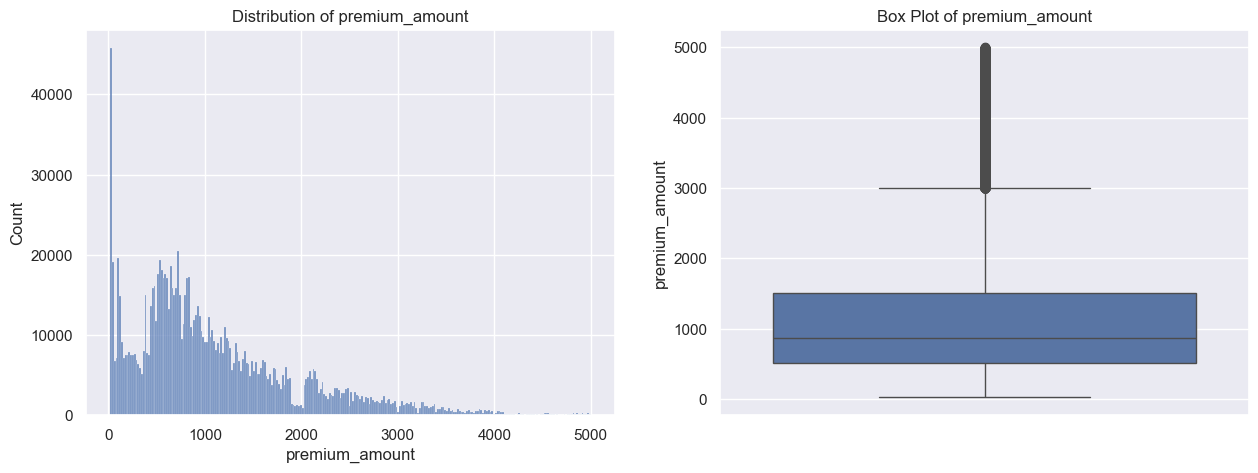

In [3]:
# Obtener estadísticas y gráficos de variables numéricas
numeric_stats, numeric_plots = analyze_numeric_columns(df)

# Mostrar estadísticas numéricas
print("\nEstadísticas de variables numéricas:")
display(numeric_stats)

# Mostrar gráficos de distribución
print("\nDistribuciones de variables numéricas:")
for col, fig in numeric_plots.items():
    display(fig)
    plt.close(fig)

/Users/marcoshernandezgarcia/notebook_project/data_utils.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/Users/marcoshernandezgarcia/notebook_project/data_utils.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/Users/marcoshernandezgarcia/notebook_project/data_utils.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/Users/marcoshernandezgarcia/notebook_project/data_utils.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.


Distribución de variables categóricas:

gender:


/Users/marcoshernandezgarcia/notebook_project/data_utils.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/Users/marcoshernandezgarcia/notebook_project/data_utils.py:190: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


gender
Male      602571
Female    597429
Name: count, dtype: int64

Cardinalidad (número de categorías únicas): 2
Categoría más frecuente: Male (602571 ocurrencias)
Categoría menos frecuente: Female (597429 ocurrencias)

marital_status:


marital_status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64

Cardinalidad (número de categorías únicas): 3
Categoría más frecuente: Single (395391 ocurrencias)
Categoría menos frecuente: Divorced (391764 ocurrencias)

education_level:


education_level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64

Cardinalidad (número de categorías únicas): 4
Categoría más frecuente: Master's (303818 ocurrencias)
Categoría menos frecuente: High School (289441 ocurrencias)

occupation:


occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64

Cardinalidad (número de categorías únicas): 3
Categoría más frecuente: Employed (282750 ocurrencias)
Categoría menos frecuente: Unemployed (276530 ocurrencias)

location:


location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64

Cardinalidad (número de categorías únicas): 3
Categoría más frecuente: Suburban (401542 ocurrencias)
Categoría menos frecuente: Urban (397511 ocurrencias)

policy_type:


policy_type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64

Cardinalidad (número de categorías únicas): 3
Categoría más frecuente: Premium (401846 ocurrencias)
Categoría menos frecuente: Basic (398554 ocurrencias)

policy_start_date:


policy_start_date
2020-02-08 15:21:39.134960    142
2023-08-13 15:21:39.155231    137
2022-02-02 15:21:39.134960    137
2022-08-30 15:21:39.134960    134
2023-11-02 15:21:39.134960    118
                             ... 
2021-06-07 15:21:39.104139      1
2024-07-19 15:21:39.233998      1
2019-12-14 15:21:39.110557      1
2020-07-23 15:21:39.217387      1
2020-10-19 15:21:39.118178      1
Name: count, Length: 167381, dtype: int64

Cardinalidad (número de categorías únicas): 167381
Categoría más frecuente: 2020-02-08 15:21:39.134960 (142 ocurrencias)
Categoría menos frecuente: 2020-10-19 15:21:39.118178 (1 ocurrencias)

customer_feedback:


customer_feedback
Average    377905
Poor       375518
Good       368753
Name: count, dtype: int64

Cardinalidad (número de categorías únicas): 3
Categoría más frecuente: Average (377905 ocurrencias)
Categoría menos frecuente: Good (368753 ocurrencias)

smoking_status:


smoking_status
Yes    601873
No     598127
Name: count, dtype: int64

Cardinalidad (número de categorías únicas): 2
Categoría más frecuente: Yes (601873 ocurrencias)
Categoría menos frecuente: No (598127 ocurrencias)

exercise_frequency:


exercise_frequency
Weekly     306179
Monthly    299830
Rarely     299420
Daily      294571
Name: count, dtype: int64

Cardinalidad (número de categorías únicas): 4
Categoría más frecuente: Weekly (306179 ocurrencias)
Categoría menos frecuente: Daily (294571 ocurrencias)

property_type:


property_type
House        400349
Apartment    399978
Condo        399673
Name: count, dtype: int64

Cardinalidad (número de categorías únicas): 3
Categoría más frecuente: House (400349 ocurrencias)
Categoría menos frecuente: Condo (399673 ocurrencias)

Gráficos de variables categóricas:


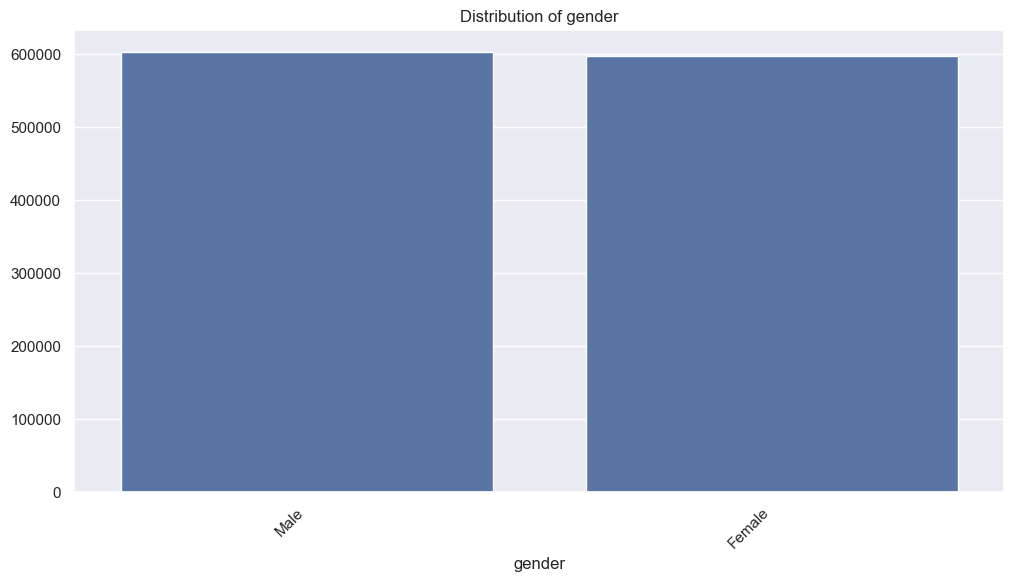

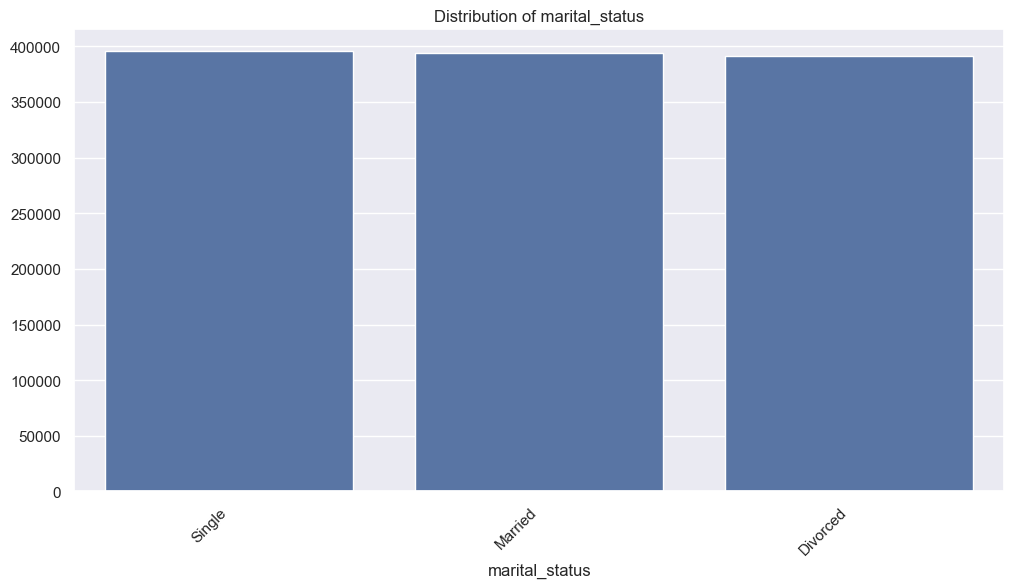

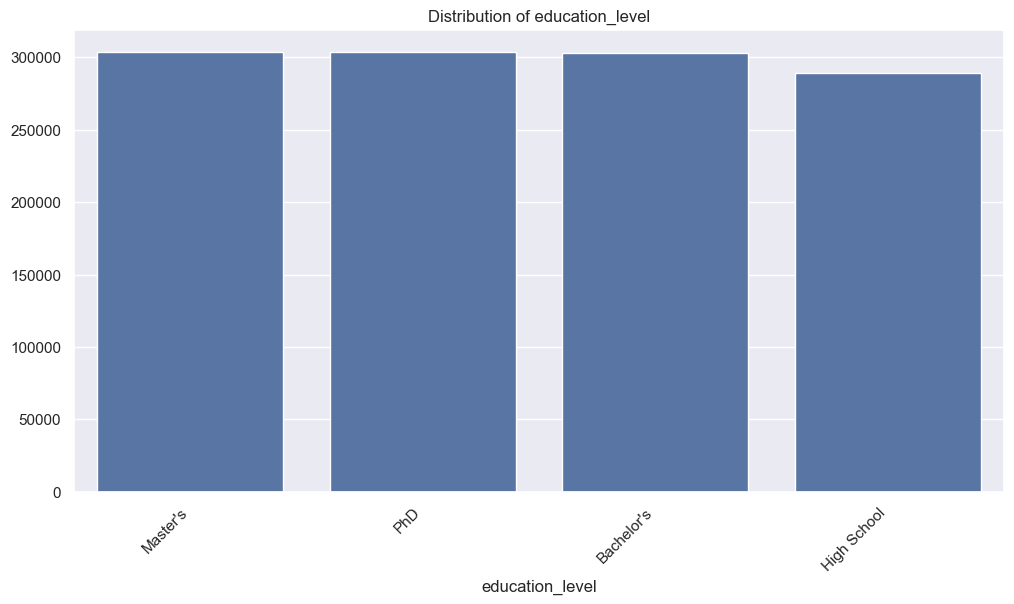

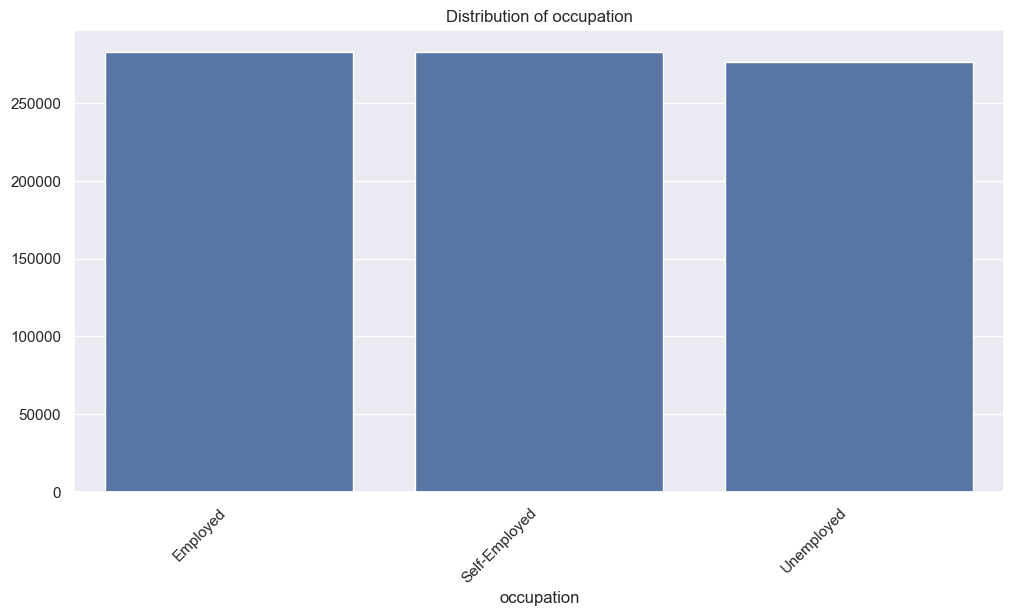

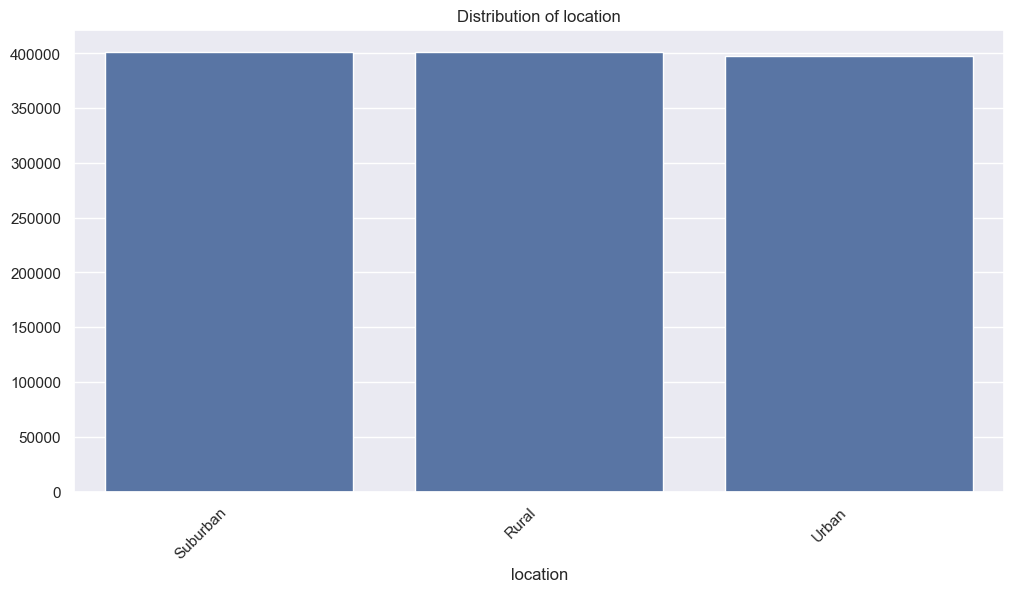

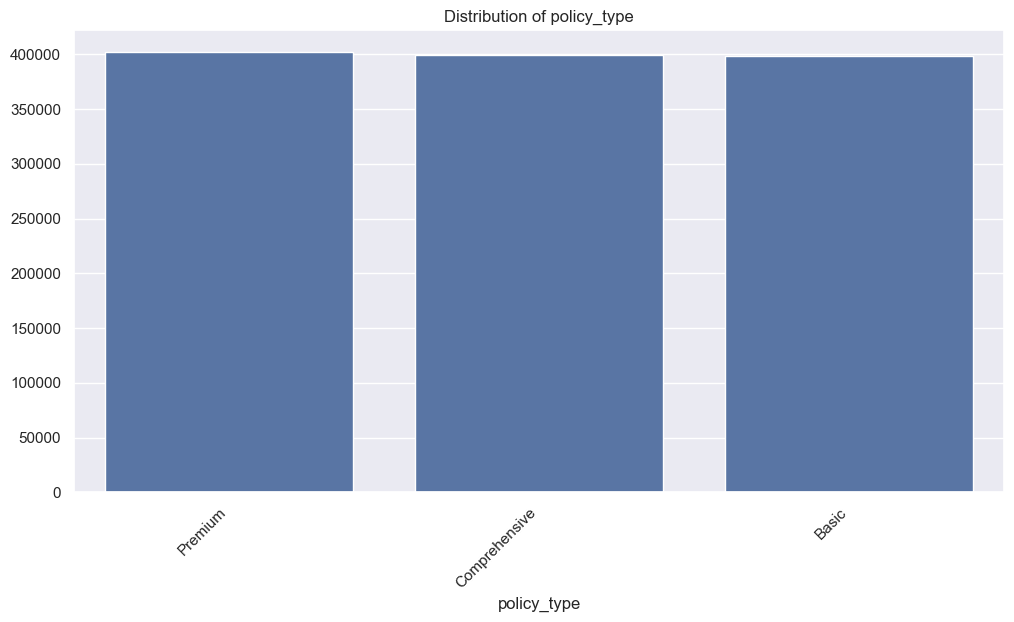

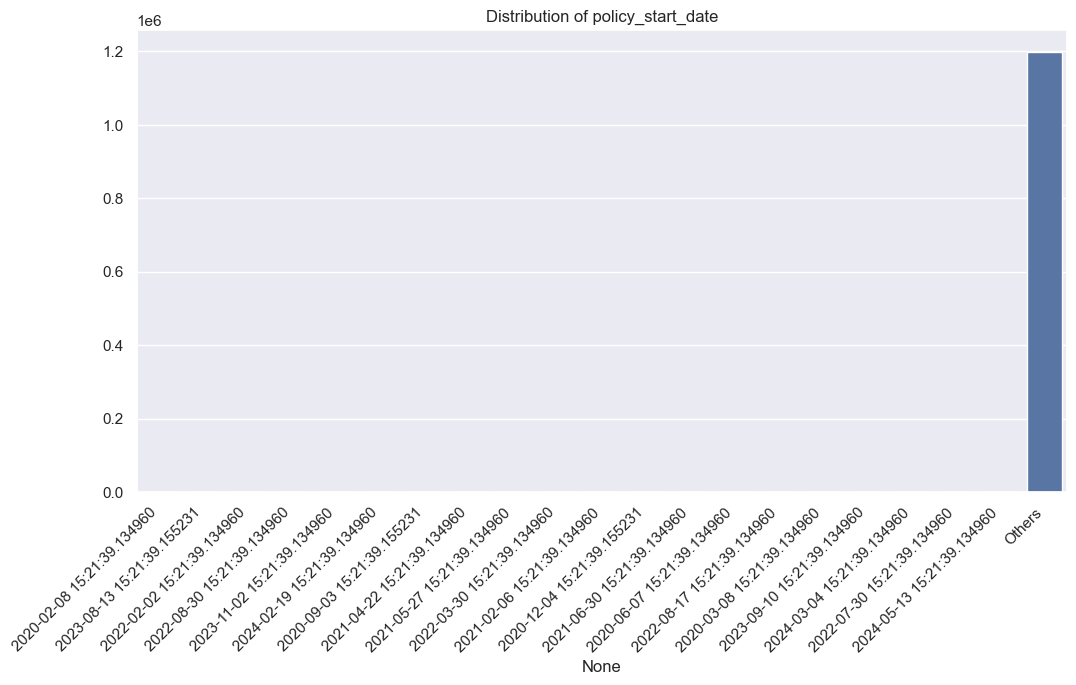

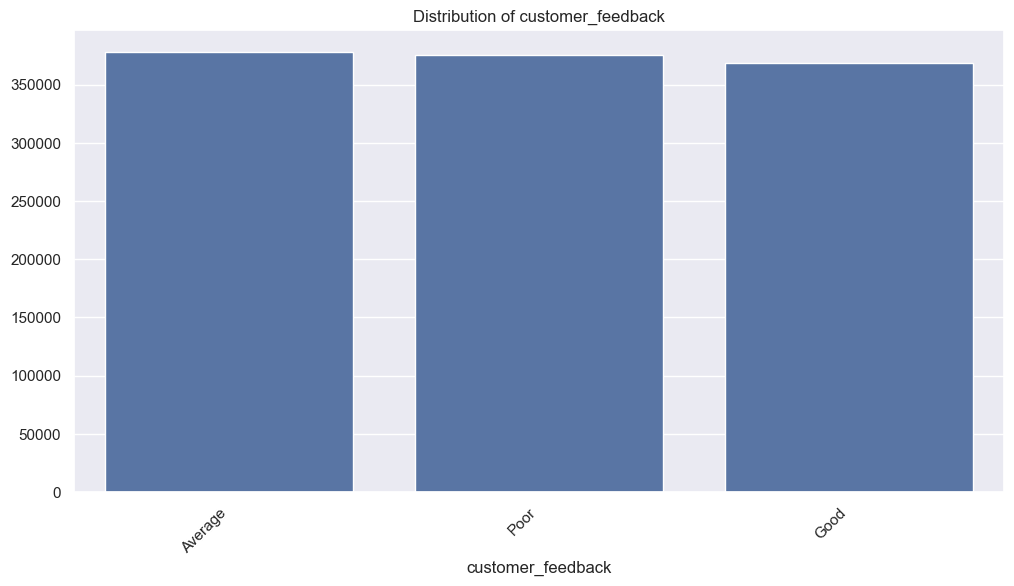

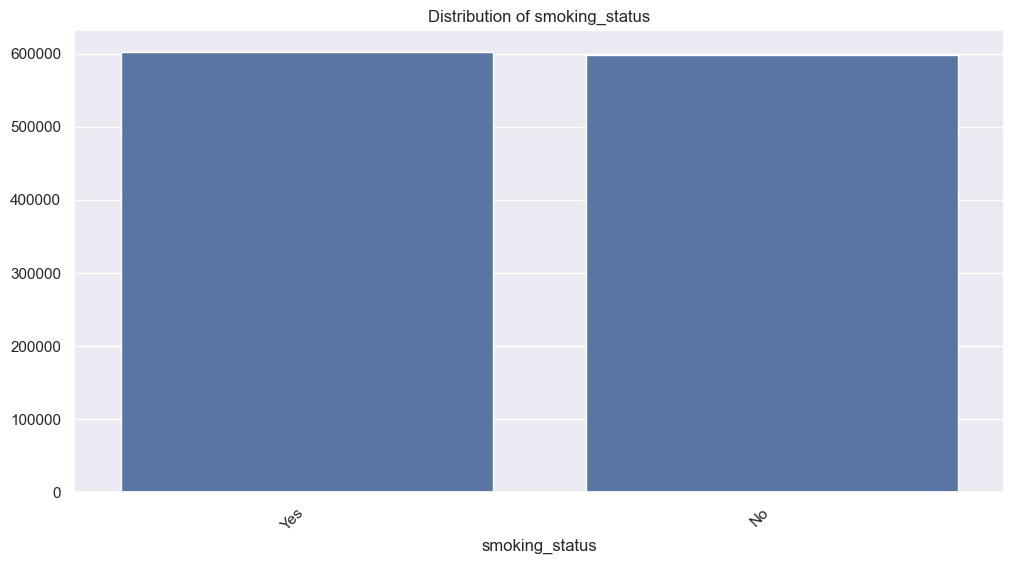

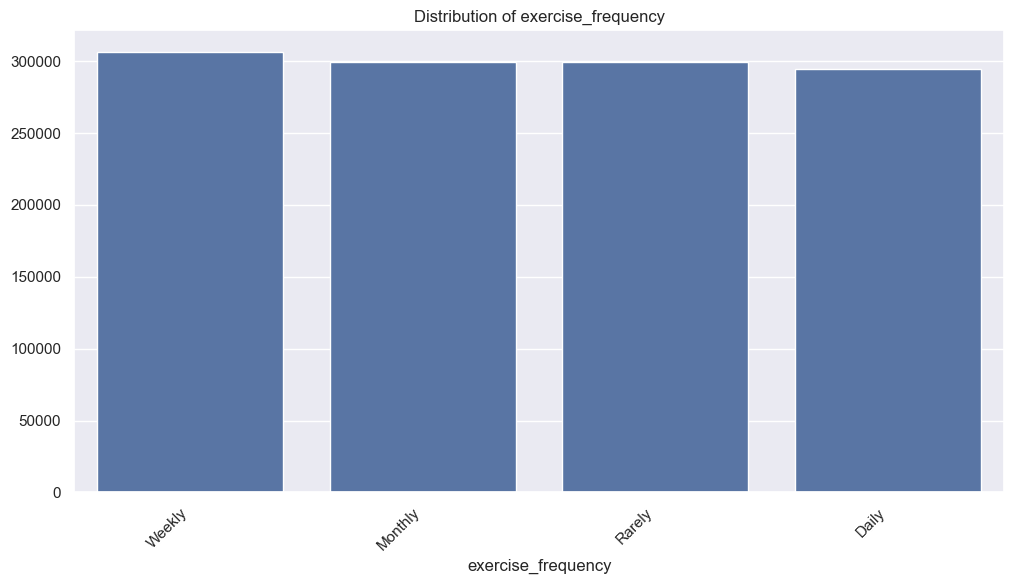

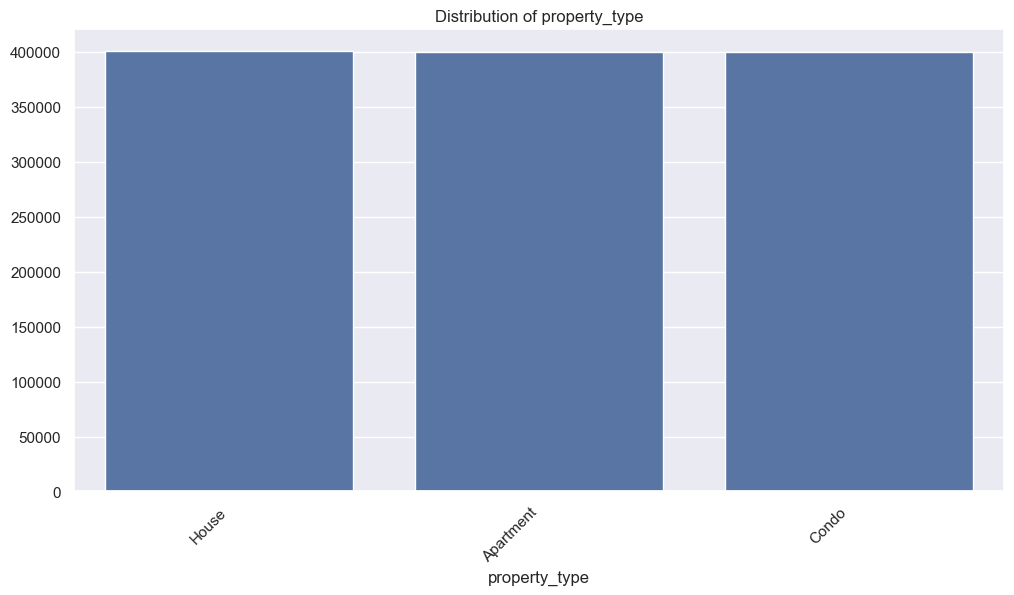

In [4]:
# Obtener estadísticas y gráficos de variables categóricas
cat_counts, cat_plots = analyze_categorical_columns(df)

# Mostrar estadísticas categóricas
print("\nDistribución de variables categóricas:")
for col, vc in cat_counts.items():
    print(f"\n{col}:")
    display(vc)
    
    # Calcular y mostrar cardinalidad
    print(f"Cardinalidad (número de categorías únicas): {vc.count()}")
    print(f"Categoría más frecuente: {vc.index[0]} ({vc.iloc[0]} ocurrencias)")
    print(f"Categoría menos frecuente: {vc.index[-1]} ({vc.iloc[-1]} ocurrencias)")

# Mostrar gráficos categóricos
print("\nGráficos de variables categóricas:")
for col, fig in cat_plots.items():
    display(fig)
    plt.close(fig)


Matriz de correlación:


,id,age,annual_income,number_of_dependents,health_score,previous_claims,vehicle_age,credit_score,insurance_duration,premium_amount
id,1.000000,-0.000135,-0.000887,0.000753,0.001414,-0.000162,-0.001461,0.000973,-0.000350,-0.000292
age,-0.000135,1.000000,-0.000009,0.001475,0.000881,0.001869,-0.002455,0.002842,-0.000064,-0.002430
annual_income,-0.000887,-0.000009,1.000000,0.002135,0.025530,0.043065,-0.000500,-0.201423,0.000379,-0.012390
number_of_dependents,0.000753,0.001475,0.002135,1.000000,0.005152,-0.004123,0.001232,-0.001714,-0.000265,-0.000976
health_score,0.001414,0.000881,0.025530,0.005152,1.000000,0.001989,0.000316,0.012016,0.002487,0.014704
previous_claims,-0.000162,0.001869,0.043065,-0.004123,0.001989,1.000000,-0.001172,0.036816,0.003001,0.046874
vehicle_age,-0.001461,-0.002455,-0.000500,0.001232,0.000316,-0.001172,1.000000,0.000508,0.003132,0.000391
credit_score,0.000973,0.002842,-0.201423,-0.001714,0.012016,0.036816,0.000508,1.000000,0.000493,-0.026014
insurance_duration,-0.000350,-0.000064,0.000379,-0.000265,0.002487,0.003001,0.003132,0.000493,1.000000,-0.000028
premium_amount,-0.000292,-0.002430,-0.012390,-0.000976,0.014704,0.046874,0.000391,-0.026014,-0.000028,1.000000



Mapa de calor de correlaciones:


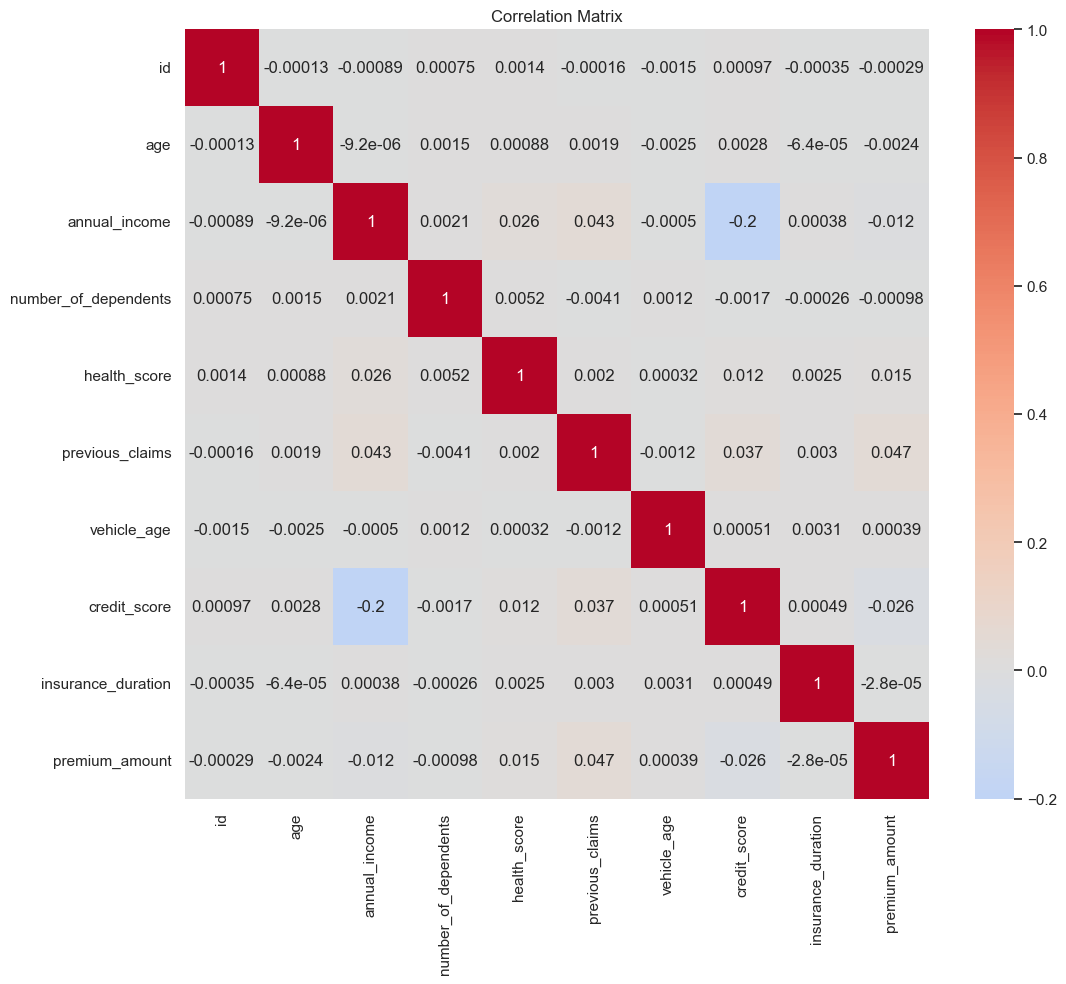


Correlaciones más fuertes (|corr| > 0.5):


In [5]:
# Calcular y visualizar correlaciones
corr_matrix, corr_plot = analyze_correlations(df)

# Mostrar matriz de correlación
print("\nMatriz de correlación:")
display(corr_matrix)

# Mostrar mapa de calor
print("\nMapa de calor de correlaciones:")
display(corr_plot)
plt.close(corr_plot)

# Identificar correlaciones más fuertes
print("\nCorrelaciones más fuertes (|corr| > 0.5):")
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 < col2:  # Evitar duplicados
            corr = corr_matrix.loc[col1, col2]
            if abs(corr) > 0.5:
                print(f"{col1} vs {col2}: {corr:.3f}")


Resumen de valores atípicos:

annual_income:
Número de outliers: 67132
Porcentaje de outliers: 5.59%
Estadísticas de outliers:


count     67132.000000
mean     122351.630579
std       14240.345960
min       99584.000000
25%      108922.000000
50%      121686.500000
75%      133817.250000
max      149997.000000
Name: annual_income, dtype: float64

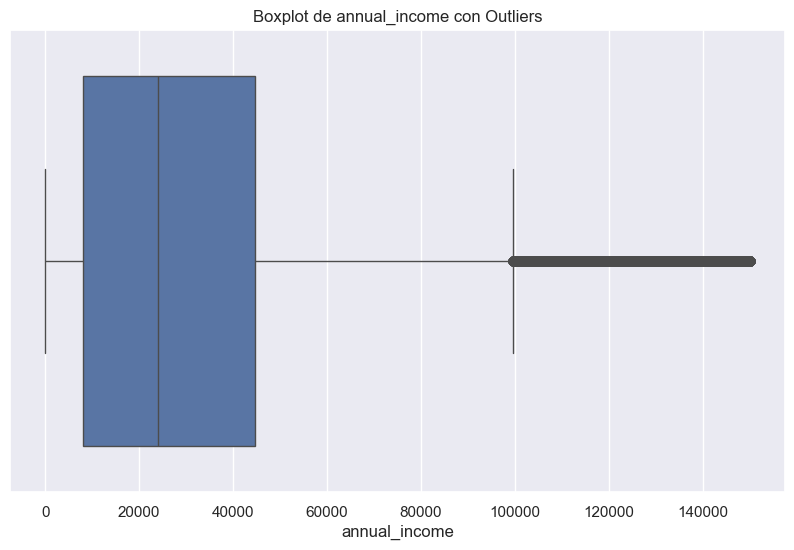


previous_claims:
Número de outliers: 369
Porcentaje de outliers: 0.03%
Estadísticas de outliers:


count    369.000000
mean       6.208672
std        0.474720
min        6.000000
25%        6.000000
50%        6.000000
75%        6.000000
max        9.000000
Name: previous_claims, dtype: float64

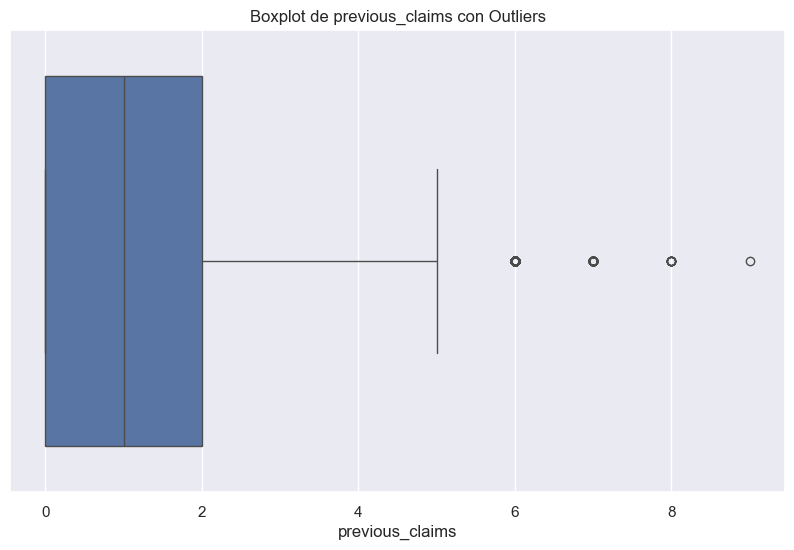


premium_amount:
Número de outliers: 49320
Porcentaje de outliers: 4.11%
Estadísticas de outliers:


count    49320.000000
mean      3555.580941
std        481.653606
min       3002.000000
25%       3173.000000
50%       3401.000000
75%       3830.000000
max       4999.000000
Name: premium_amount, dtype: float64

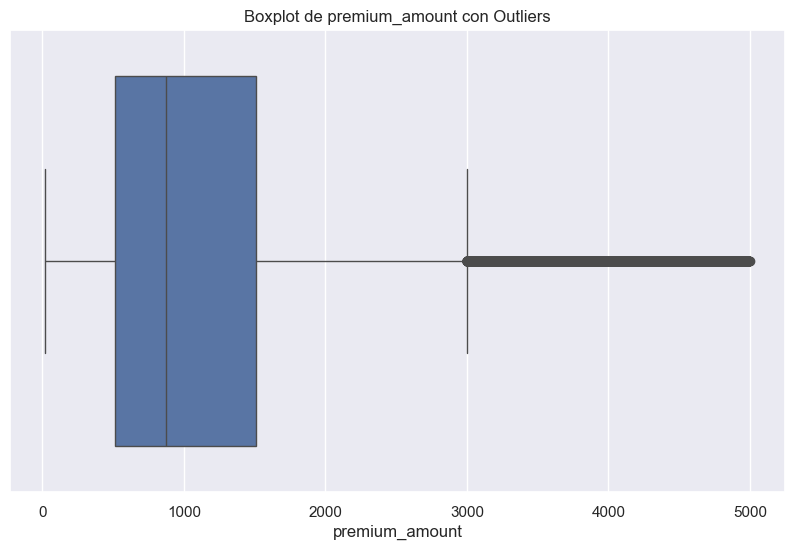

In [6]:
# Detectar outliers
outliers = detect_outliers(df)

# Mostrar resumen de outliers
print("\nResumen de valores atípicos:")
for col, out_values in outliers.items():
    if len(out_values) > 0:
        print(f"\n{col}:")
        print(f"Número de outliers: {len(out_values)}")
        print(f"Porcentaje de outliers: {(len(out_values) / len(df)) * 100:.2f}%")
        print("Estadísticas de outliers:")
        display(out_values.describe())
        
        # Visualizar outliers con boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col} con Outliers')
        plt.show()

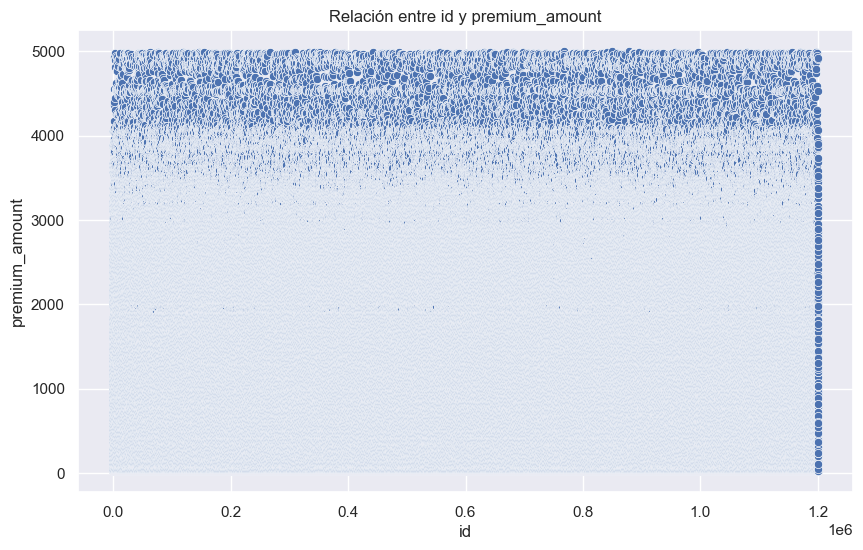

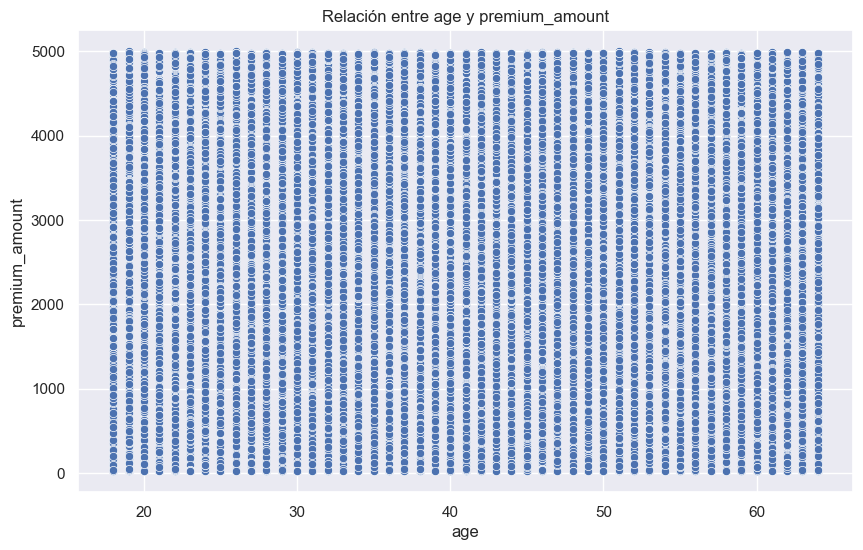

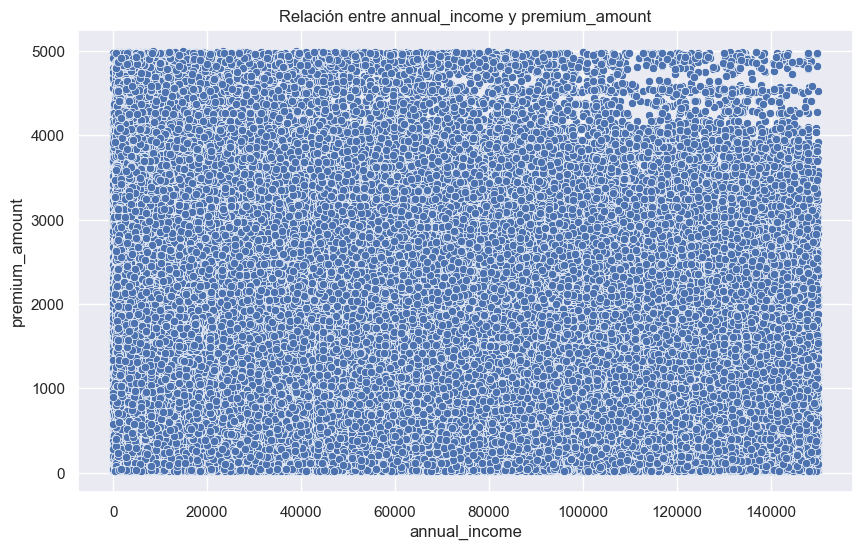

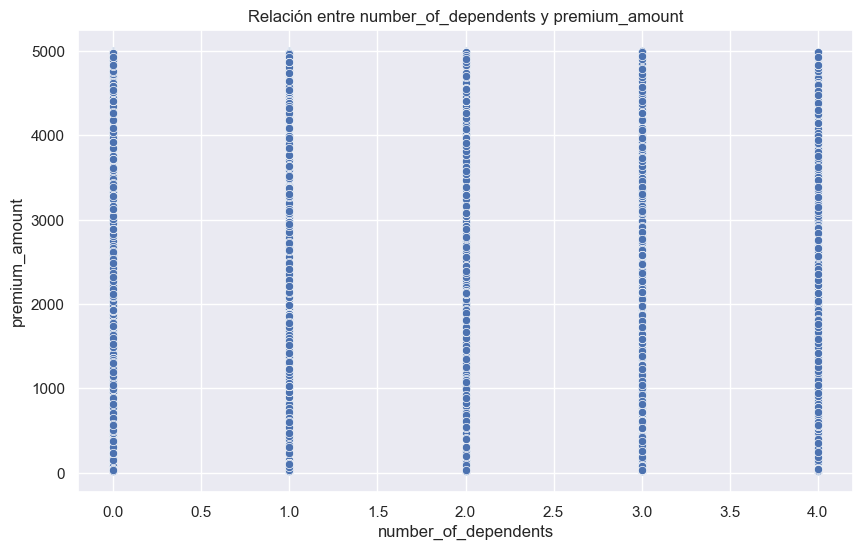

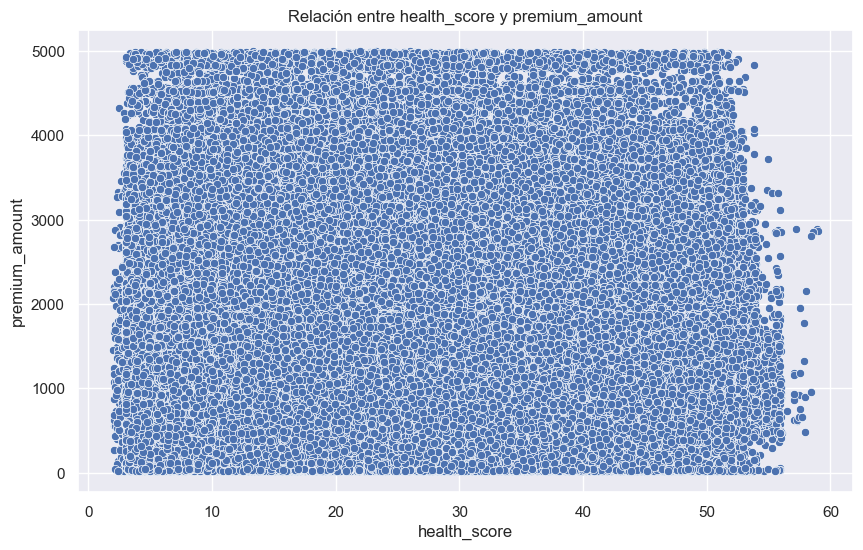

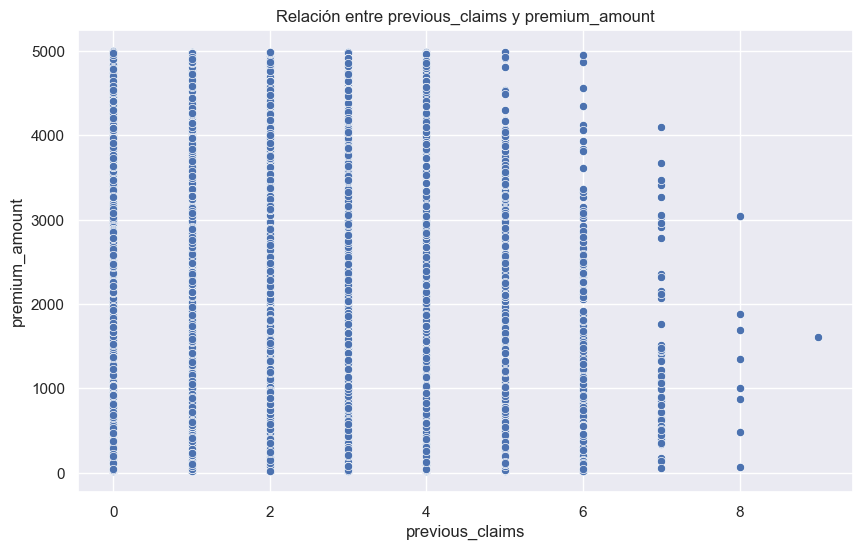

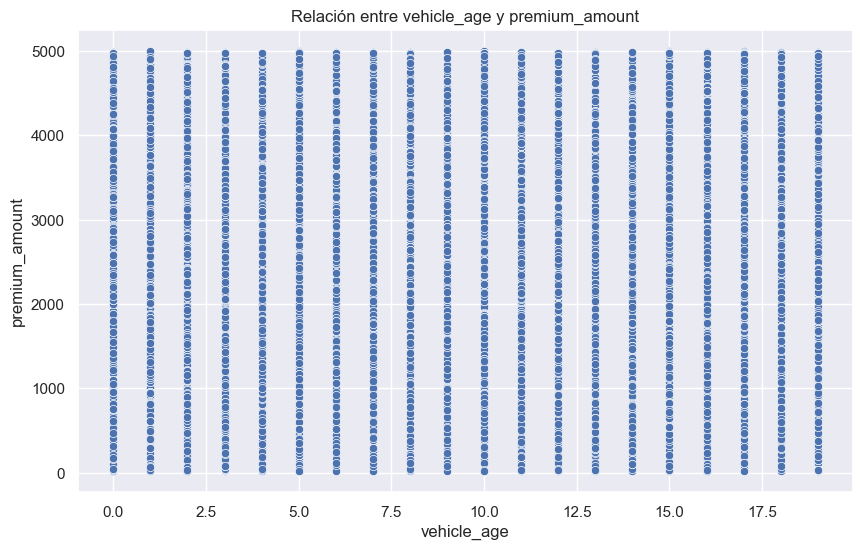

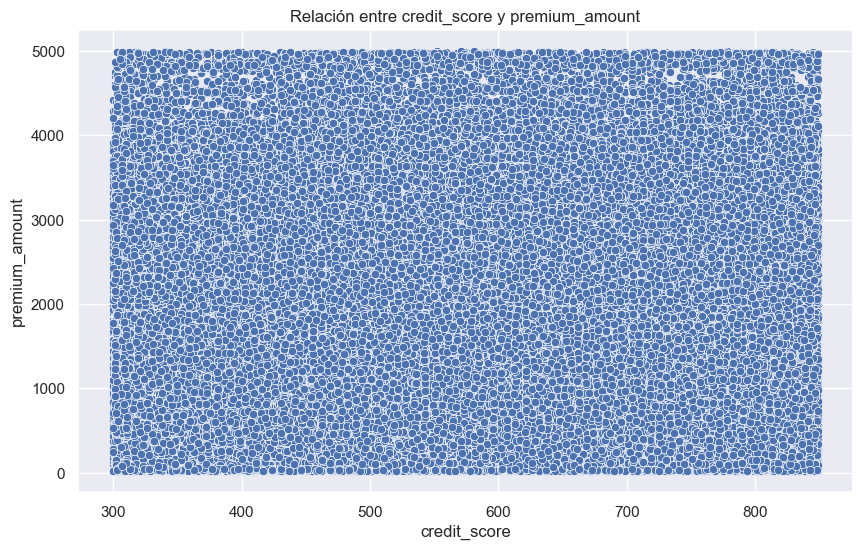

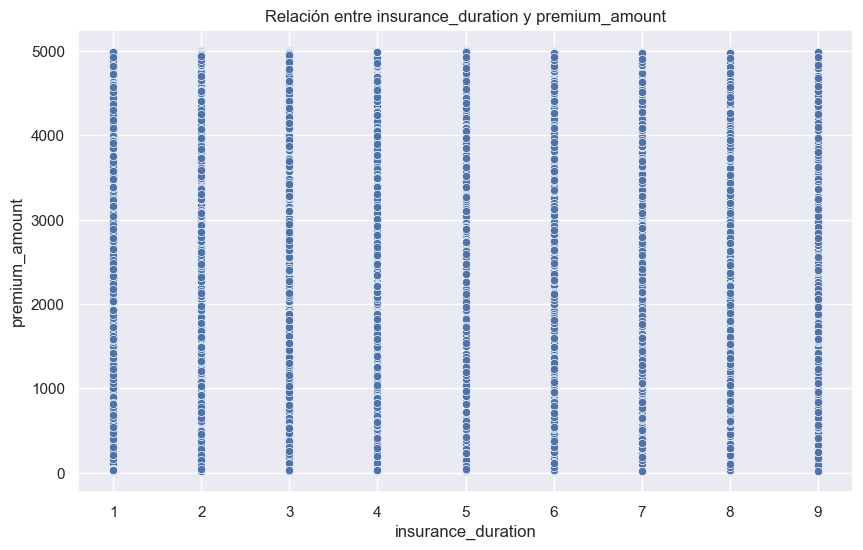

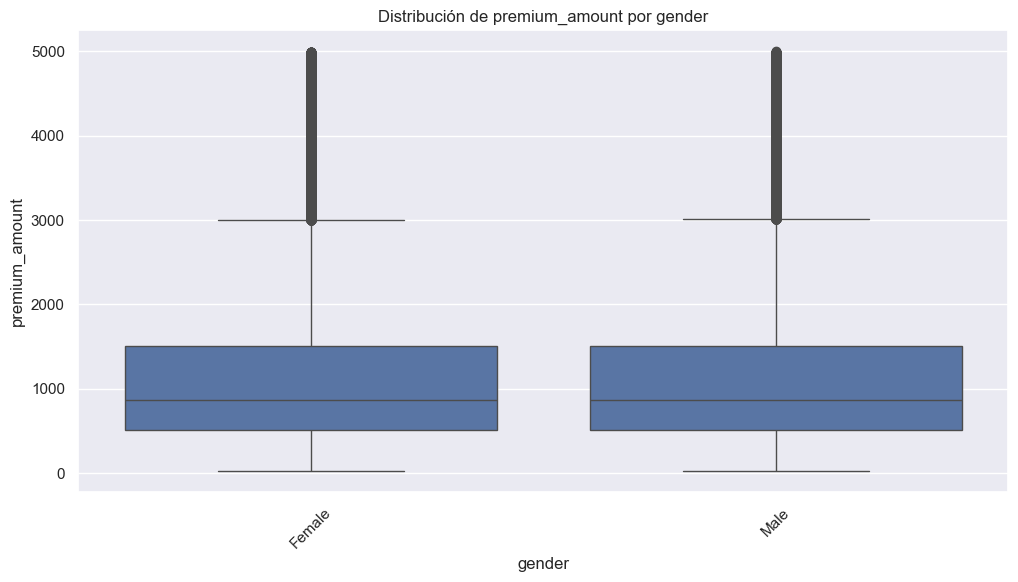

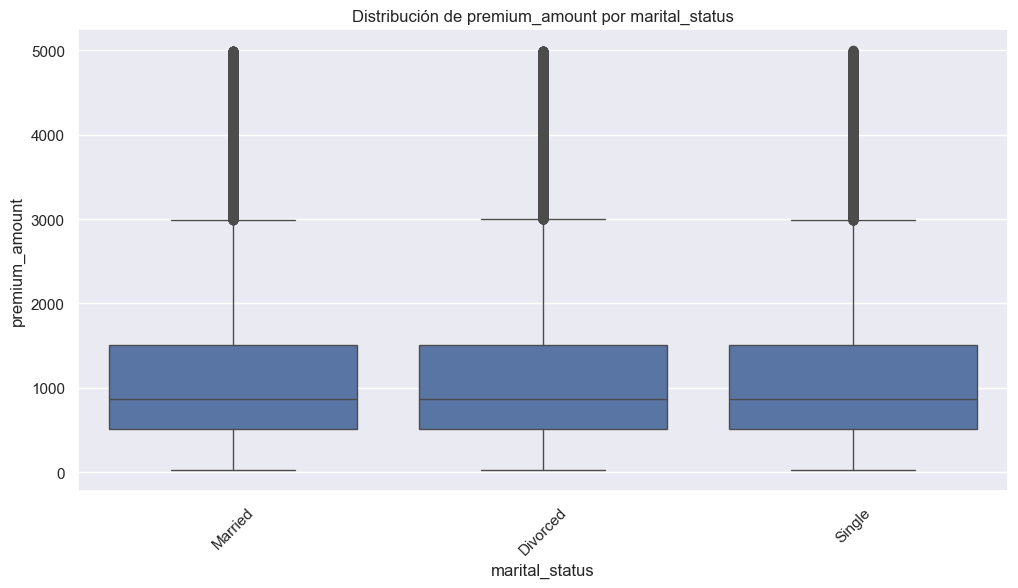

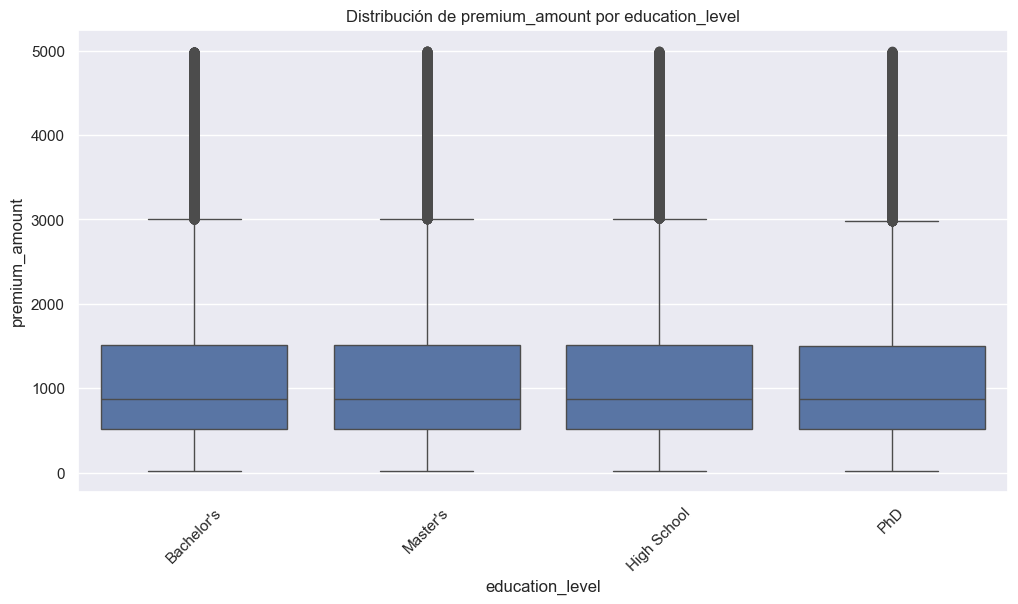

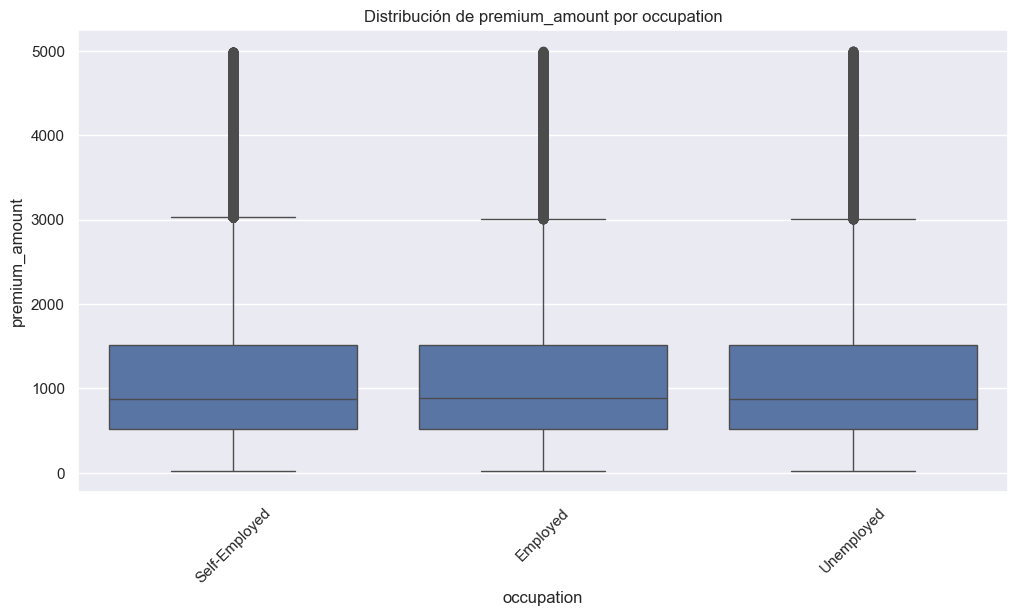

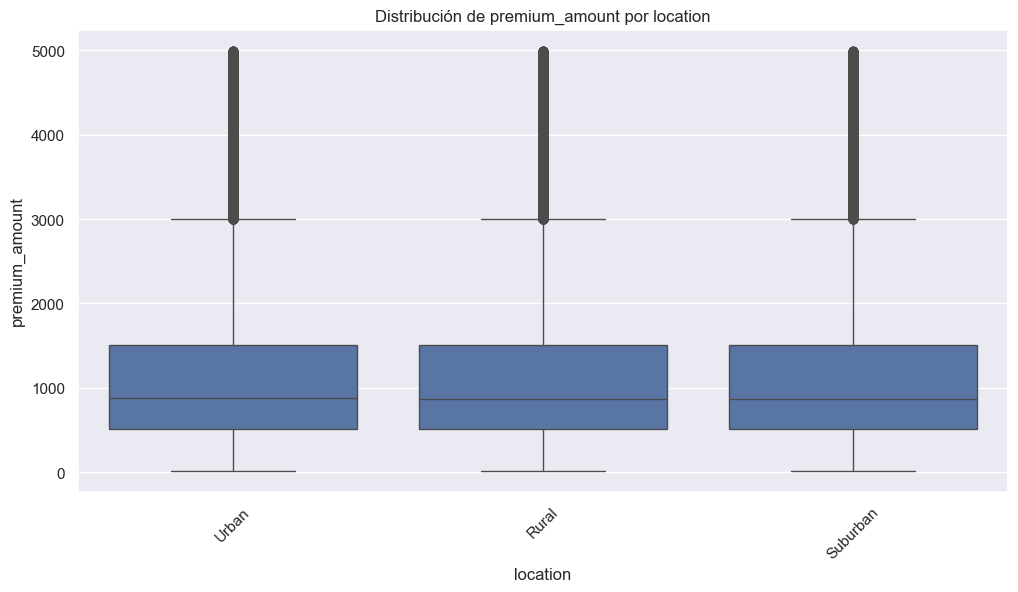

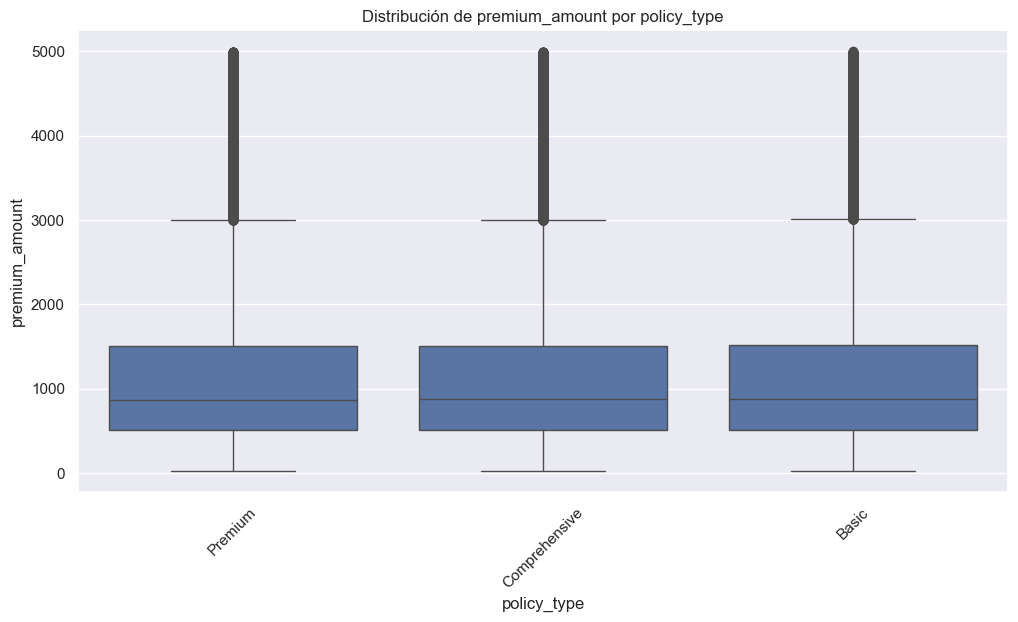

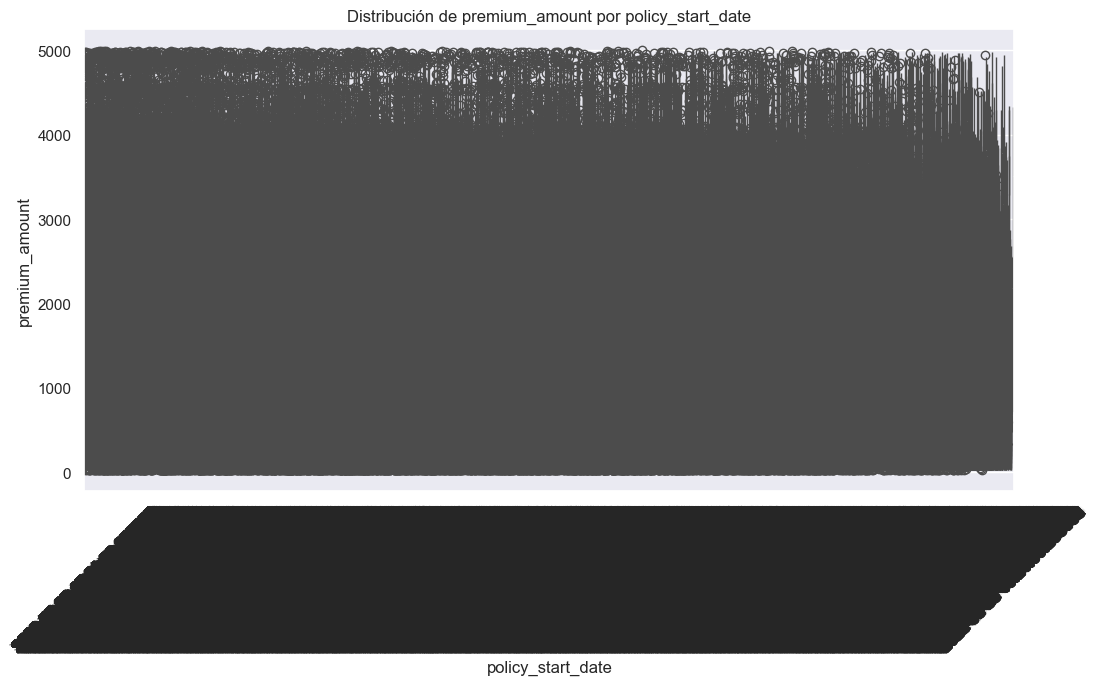

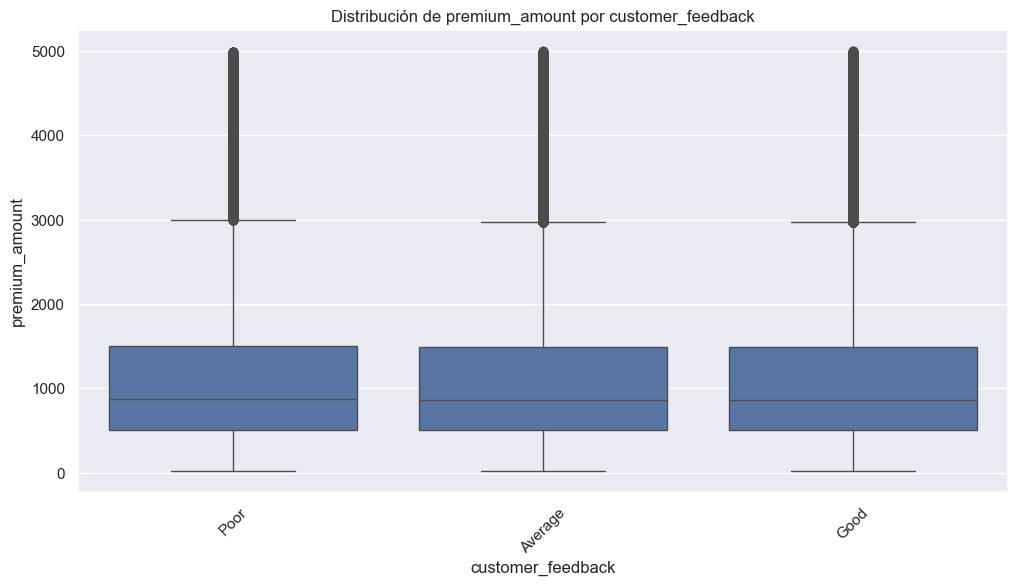

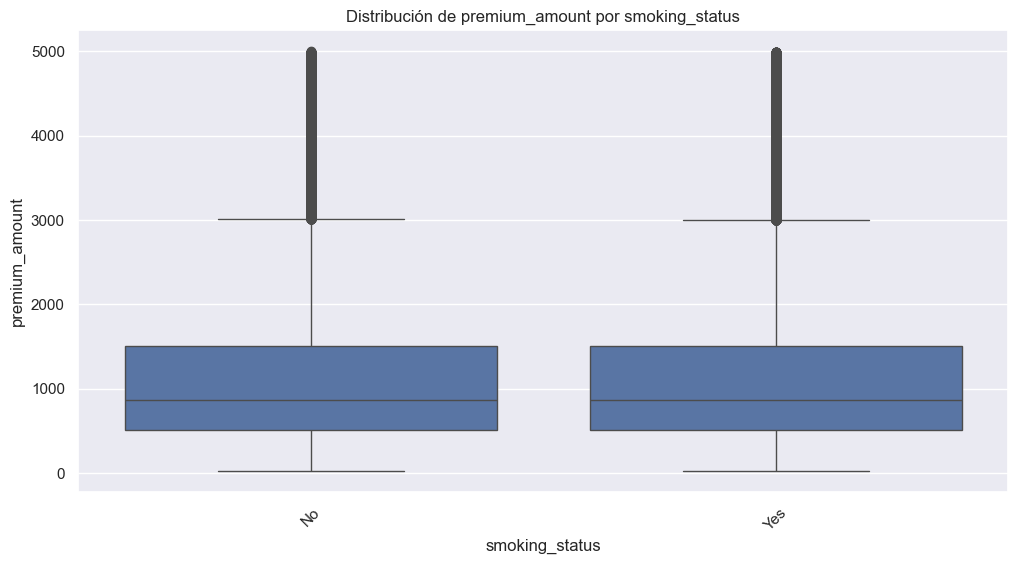

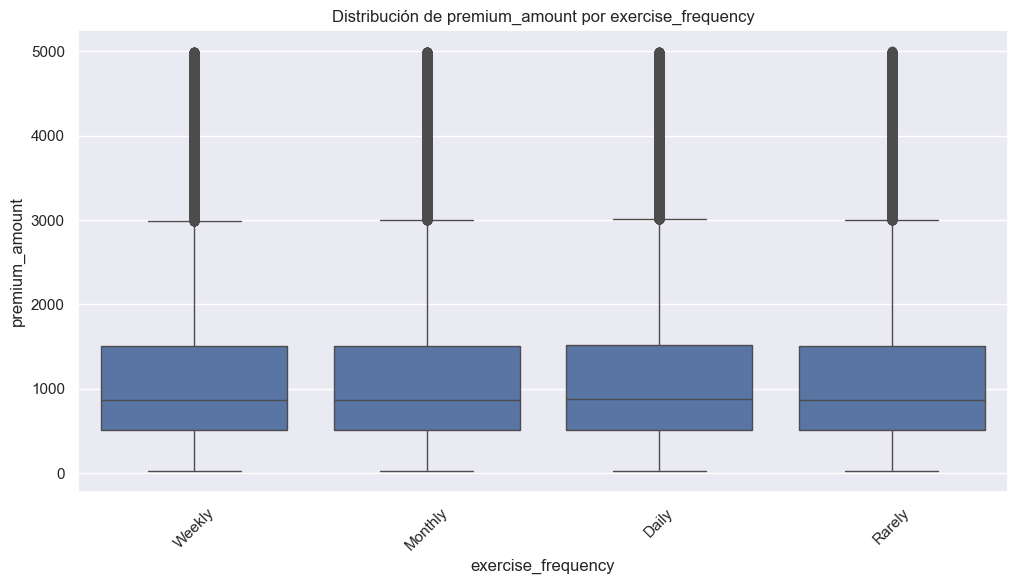

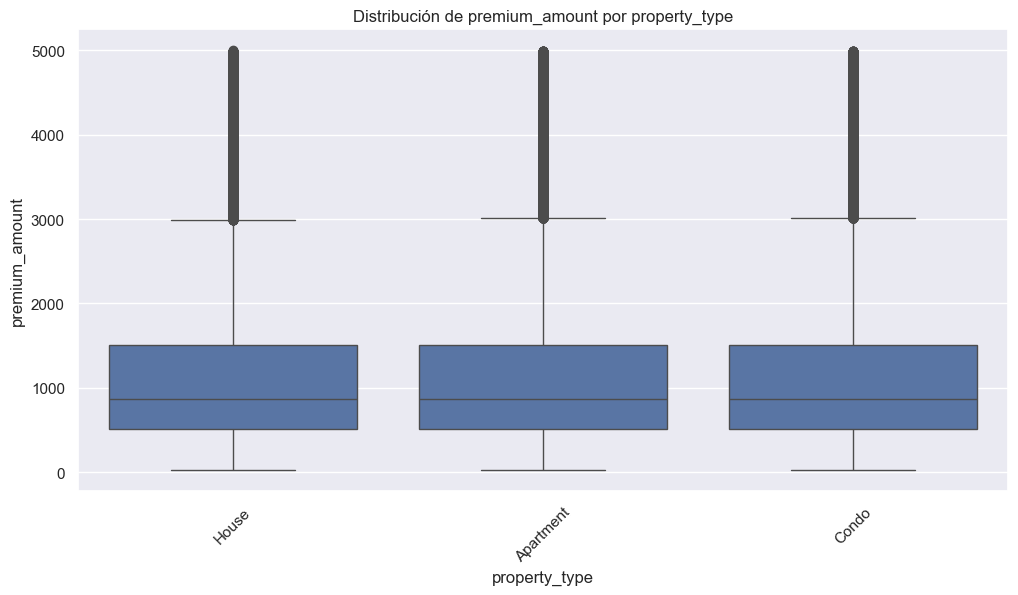

In [8]:
target_column = 'premium_amount'  # Reemplaza con el nombre de tu variable objetivo

if target_column in df.columns:
    # Para variables numéricas vs target
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        if col != target_column:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df, x=col, y=target_column)
            plt.title(f'Relación entre {col} y {target_column}')
            plt.show()
    
    # Para variables categóricas vs target
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        if col != target_column:
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=df, x=col, y=target_column)
            plt.xticks(rotation=45)
            plt.title(f'Distribución de {target_column} por {col}')
            plt.show()

In [9]:
print("=== RESUMEN DEL ANÁLISIS EXPLORATORIO ===")
print("\n1. Información general del dataset:")
print(f"- Número de registros: {len(df)}")
print(f"- Número de variables: {len(df.columns)}")
print(f"- Tipos de variables:\n{df.dtypes.value_counts()}")

print("\n2. Valores faltantes:")
missing_total = missing_stats[missing_stats['missing_count'] > 0]
if not missing_total.empty:
    print("- Columnas con valores faltantes:")
    for idx, row in missing_total.iterrows():
        print(f"  * {idx}: {row['missing_percentage']:.2f}%")
else:
    print("- No hay valores faltantes en el dataset")

print("\n3. Variables numéricas:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"- Número de variables numéricas: {len(numeric_cols)}")
if len(numeric_cols) > 0:
    print("- Variables con alta asimetría (|skew| > 1):")
    skewed = numeric_stats.loc['skew'][abs(numeric_stats.loc['skew']) > 1]
    for col, skew in skewed.items():
        print(f"  * {col}: {skew:.2f}")

print("\n4. Variables categóricas:")
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"- Número de variables categóricas: {len(cat_cols)}")
if len(cat_cols) > 0:
    print("- Cardinalidad de variables categóricas:")
    for col in cat_cols:
        print(f"  * {col}: {df[col].nunique()} categorías")

print("\n5. Correlaciones importantes:")
high_corr = []
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 < col2:
            corr = corr_matrix.loc[col1, col2]
            if abs(corr) > 0.7:
                high_corr.append((col1, col2, corr))
if high_corr:
    print("- Pares de variables con alta correlación (|corr| > 0.7):")
    for col1, col2, corr in high_corr:
        print(f"  * {col1} vs {col2}: {corr:.3f}")
else:
    print("- No se encontraron correlaciones fuertes entre las variables")

print("\n6. Outliers:")
print("- Variables con outliers significativos (>1% de los datos):")
for col, out_values in outliers.items():
    if len(out_values) > len(df) * 0.01:
        print(f"  * {col}: {(len(out_values) / len(df)) * 100:.2f}% de outliers")

=== RESUMEN DEL ANÁLISIS EXPLORATORIO ===

1. Información general del dataset:
- Número de registros: 1200000
- Número de variables: 21
- Tipos de variables:
object     11
float64     9
int64       1
Name: count, dtype: int64

2. Valores faltantes:
- Columnas con valores faltantes:
  * previous_claims: 30.34%
  * occupation: 29.84%
  * credit_score: 11.49%
  * number_of_dependents: 9.14%
  * customer_feedback: 6.49%
  * health_score: 6.17%
  * annual_income: 3.75%
  * age: 1.56%
  * marital_status: 1.54%
  * vehicle_age: 0.00%
  * insurance_duration: 0.00%

3. Variables numéricas:
- Número de variables numéricas: 10
- Variables con alta asimetría (|skew| > 1):
  * annual_income: 1.47
  * premium_amount: 1.24

4. Variables categóricas:
- Número de variables categóricas: 11
- Cardinalidad de variables categóricas:
  * gender: 2 categorías
  * marital_status: 3 categorías
  * education_level: 4 categorías
  * occupation: 3 categorías
  * location: 3 categorías
  * policy_type: 3 categoría